# phylogeny of global M. bovis lineages

R Script

In [ ]:
library("ape")
library("phytools")
library(seqinr)
library(RColorBrewer)

In [11]:
options(repr.plot.width=16, repr.plot.height=10)

In [99]:
setwd('/storage/btbgenie/combined_results/')
meta <- read.table('/storage/btbgenie/combined_results/metadata.csv',sep=',',
                      header=TRUE,row.names=2)
print (length(rownames(meta)))
meta[is.na(meta)] <- "-"
mltree <- read.tree('/storage/btbgenie/combined_results/tree.newick')

meta1 <- read.table('/storage/btbgenie/global_results/metadata.csv',sep=',',
                   header=TRUE,row.names=1)
meta1[is.na(meta1)] <- "-"
mltree1 <- read.tree('/storage/btbgenie/global_results/tree.newick')


[1] 541


In [101]:
length(mltree$tip.label)

[1] 546

In [93]:
plot_tree <- function(mltree,samples,type='phylogram',title='',column='SB',cmap="Set1") {
  labels <- samples[mltree$tip.label,][[column]]
  #print(labels)
  labels[is.na(labels)] <- "Other"
  
  leglabels <- levels(as.factor(labels))
  n<-length(leglabels)
  colors <- brewer.pal(n = n, name = cmap)
  cols<-setNames(colors[1:length(leglabels)],leglabels)
  
  plot(mltree, type=type,cex=.2,label.offset=5, edge.width=.5,show.tip.label=FALSE)
  title(title,cex.main= 2)
  tiplabels(pie=to.matrix(labels, levels(as.factor(labels))),cex=.2,piecol=cols)
  add.scale.bar(x=100,lwd=2, cex=1)
  legcolors <- cols[leglabels]
  legend("bottomleft", legend=names(cols), inset=c(-0.1, .2), pch=22, pt.bg=legcolors, pt.cex=2.5, bty='n')
}

In [94]:
colnames(meta)

[1] "X"                    "SB"                   "batch"               
 [4] "county"               "Country"              "filename1"           
 [7] "filename2"            "name1"                "name2"               
[10] "read_length"          "bam_file"             "Run"                 
[13] "BioProject"           "geo_loc_name_country" "Center.Name"         
[16] "Instrument"           "LibraryLayout"        "ReleaseDate"         
[19] "SRA.Study"            "Bytes"                "Bases"               
[22] "Collection_Date"      "code"                 "SequenceName"        
[25] "ClusterNumber"        "Country1"             "SB1"

Warning message in brewer.pal(n = n, name = cmap):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


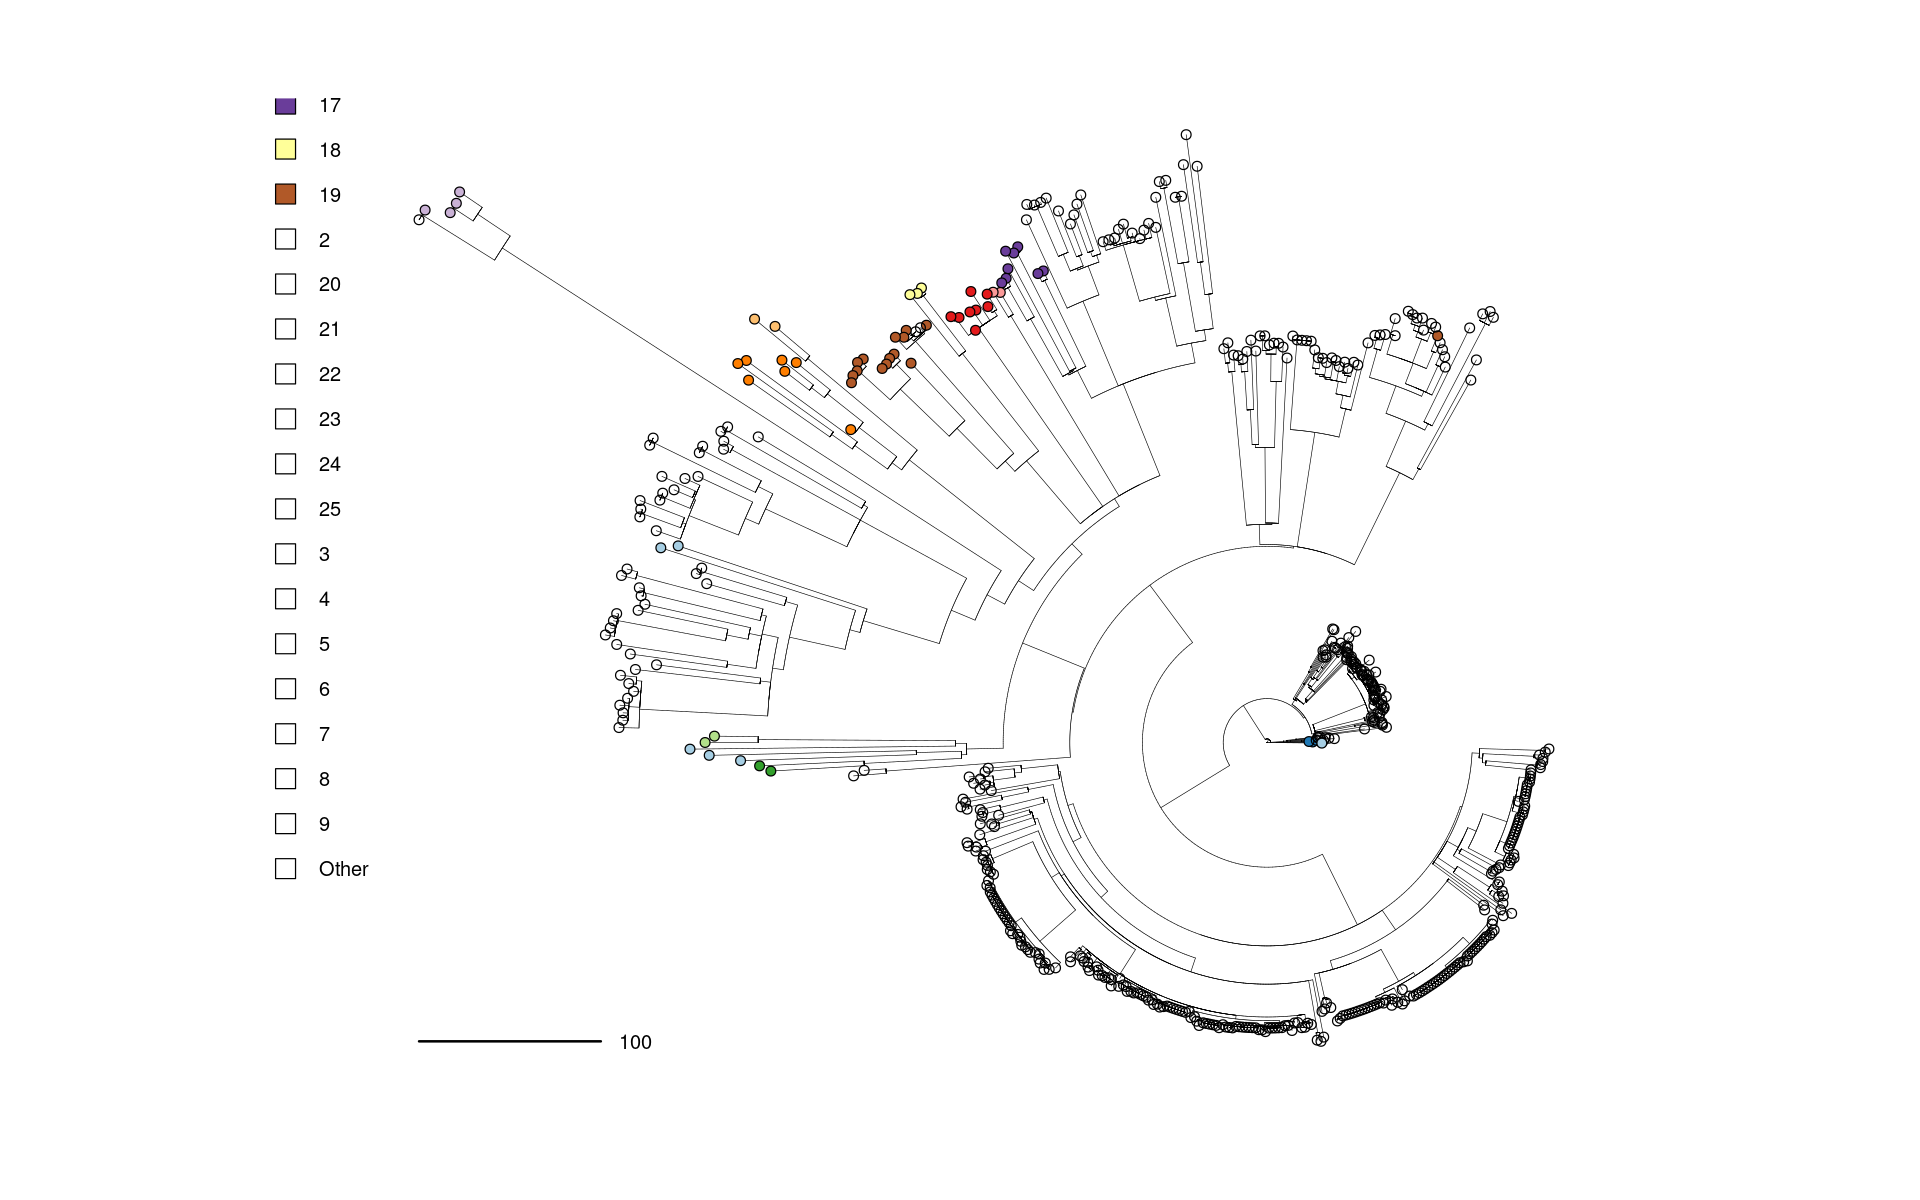

In [97]:
plot_tree(mltree,meta,'fan',column='ClusterNumber',cmap='Paired')

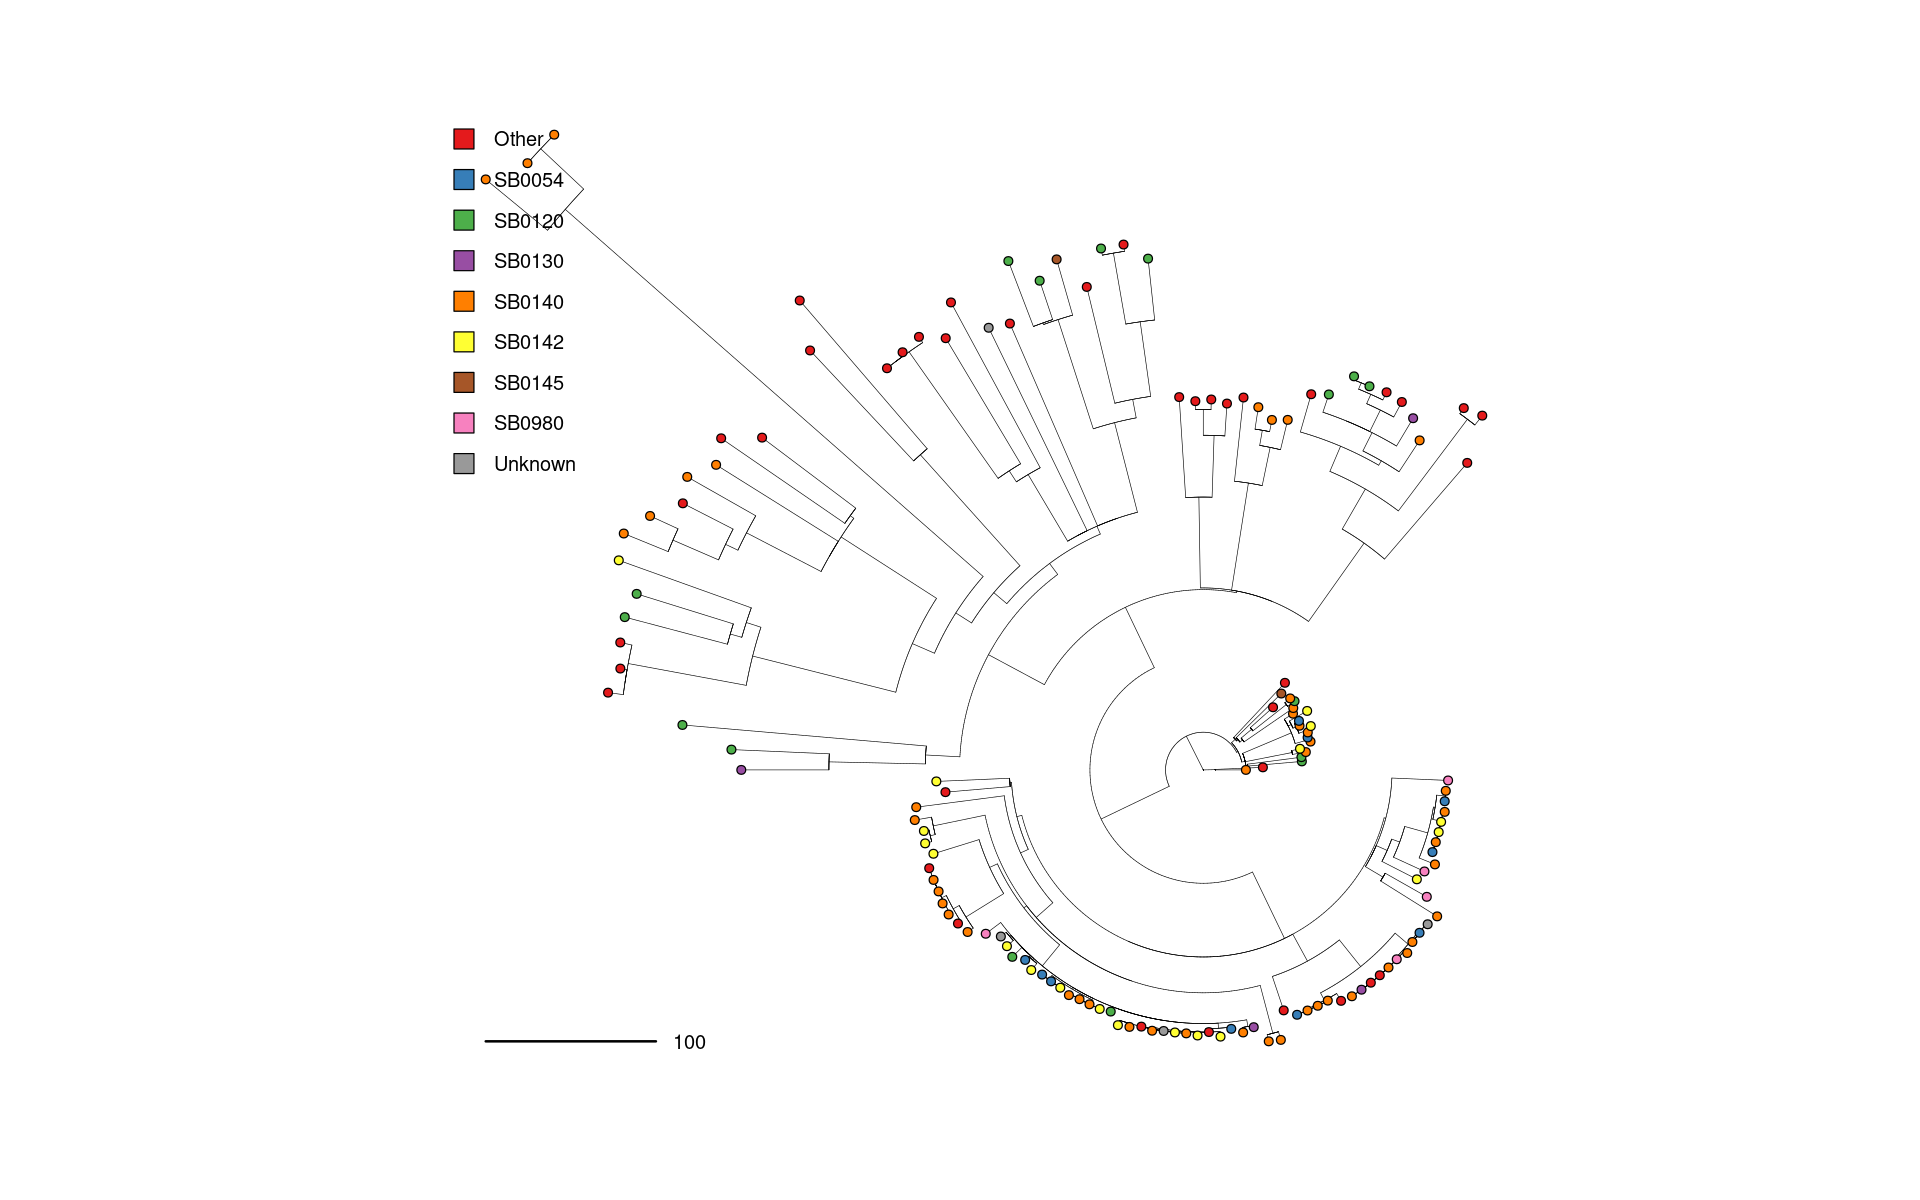

In [14]:
randtips<-sample(mltree$tip.label,400)
randtree <- drop.tip(mltree, randtips)
plot_tree(randtree,meta,column='SB1',type='fan')

Warning message in brewer.pal(n = n, name = cmap):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”


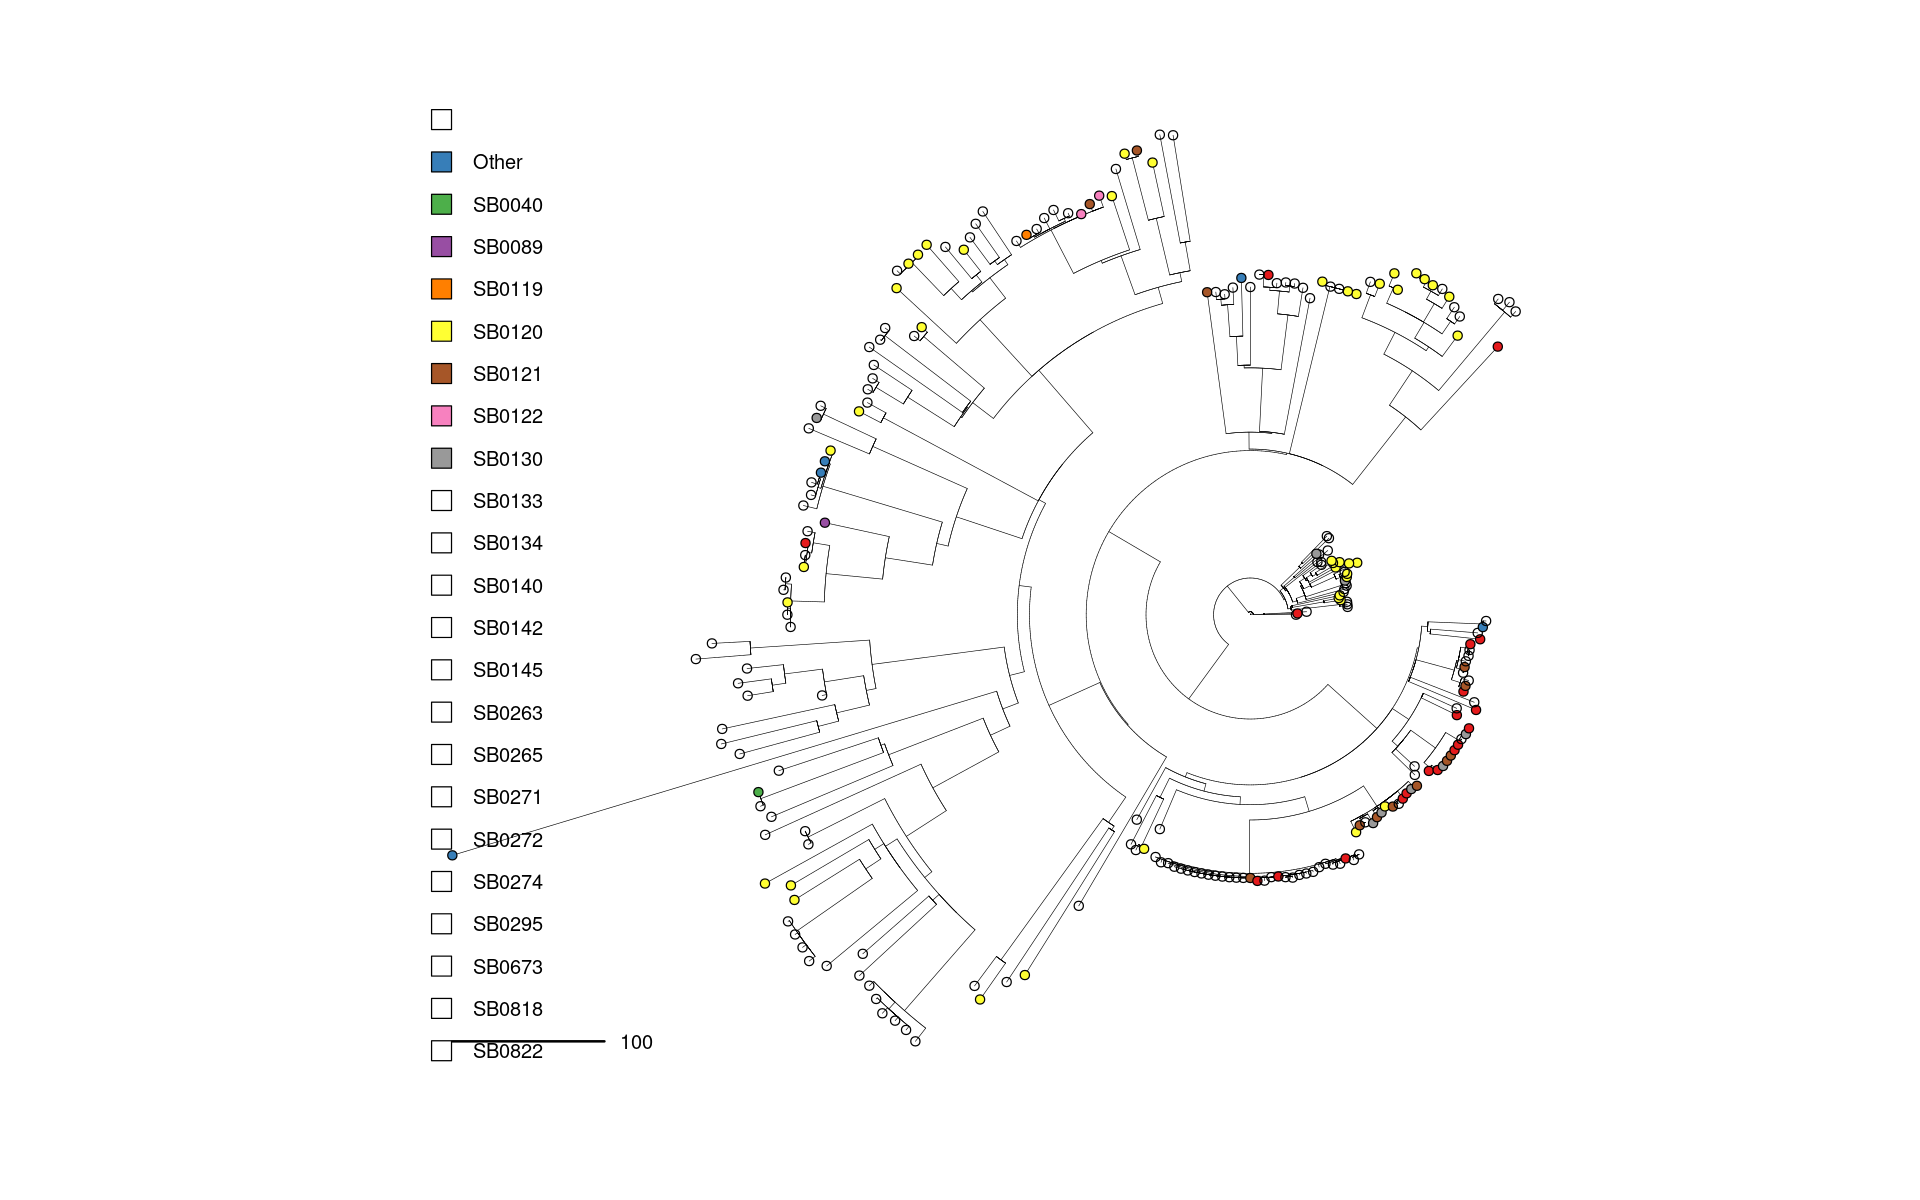

In [22]:
#ireland
tips<-row.names(meta[meta$Country=='Ireland',])
itree <- drop.tip(mltree, tips)
plot_tree(itree,meta,column='SB',type='fan')

In [ ]:
#non-Ireland
plot_tree(mltree1,meta1,'fan',column='geo_loc_name_country',cmap='Paired')